# Machine Learning
## Prediksi Penyakit Jantung 
### KNN Euclidean Distance

# Import library 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning


# Deklarasi dataset

In [69]:
dataset = pd.read_csv('heart.csv')

# Describe dataset
Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [70]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Plot Korelasi setiap variabel

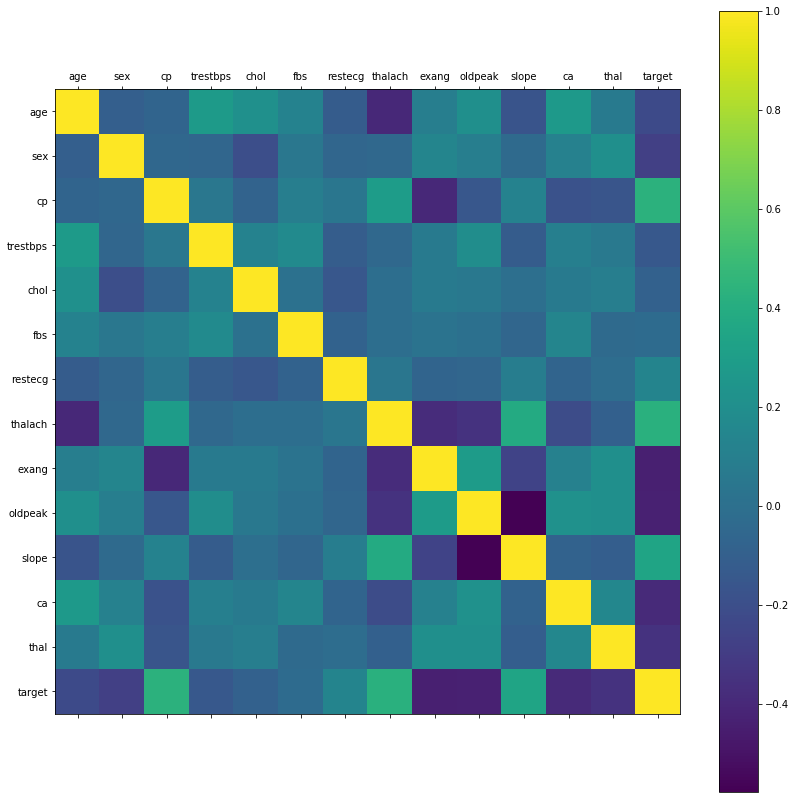

In [50]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

# Normalisasi variable untuk data training

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [43]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
5,0.290464,1,0,0.478391,-1.048678,0,1,-0.072018,0,-0.551783,1,0,1,1
6,0.180175,0,1,0.478391,0.922521,0,0,0.146634,0,0.224643,1,0,2,1
7,-1.143291,1,1,-0.663867,0.323431,0,1,1.021244,0,-0.896862,2,0,3,1
8,-0.260980,1,2,2.306004,-0.913400,1,1,0.540209,0,-0.465514,2,0,3,1
9,0.290464,1,2,1.049520,-1.512490,0,1,1.064975,0,0.483451,2,0,2,1


# Training dataset

## Split dataset

33% datatest
67% datatrain

In [44]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [51]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
    

# Mengukur akurasi score setiap K 
## 0-20 Neighbors

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

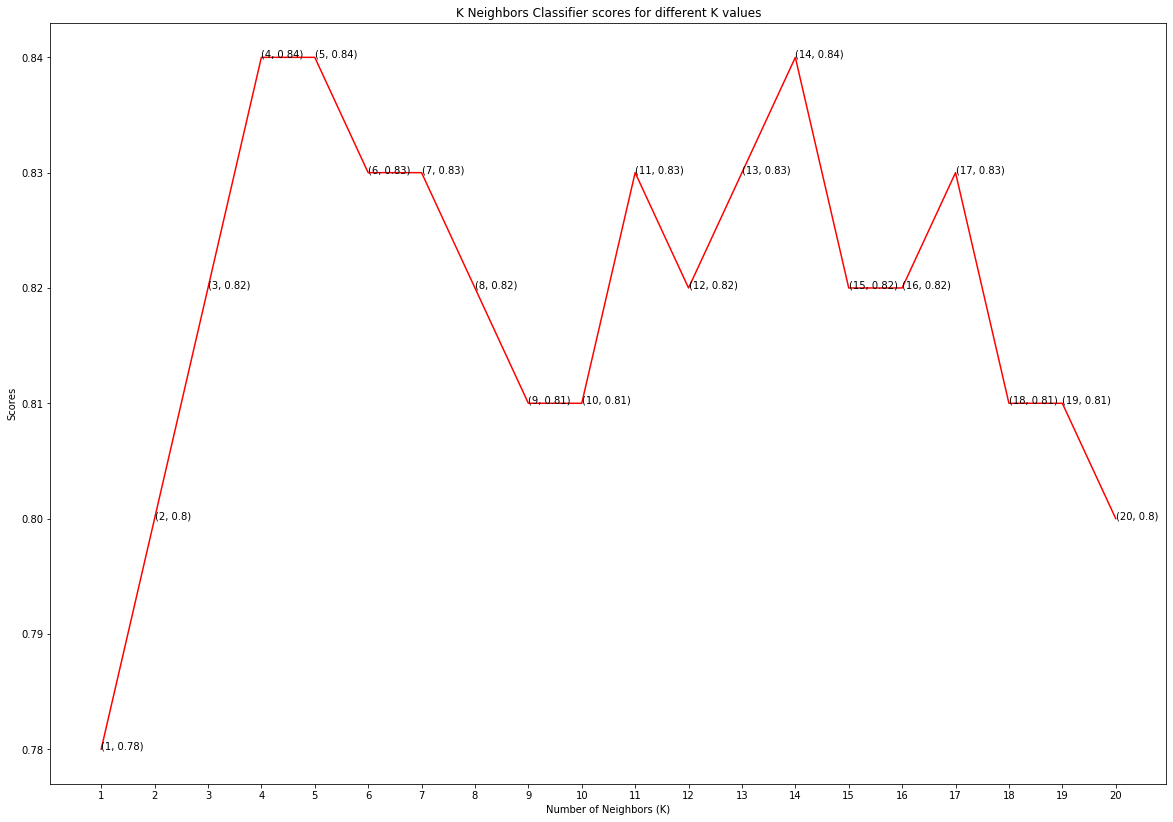

In [61]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

# Test prediksi 

In [62]:
df_test = pd.read_csv("test.csv");

In [63]:
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,59,1,0,170,326,0,0,140,1,3.4,0,0,3
1,46,1,2,150,231,0,1,147,0,3.6,1,0,2
2,67,1,0,125,254,1,1,163,0,0.2,1,2,3
3,62,1,0,120,267,0,1,99,1,1.8,1,2,3
4,65,1,0,110,248,0,0,158,0,0.6,2,2,1
5,44,1,0,110,197,0,0,177,0,0.0,2,1,2
6,60,1,0,125,258,0,0,141,1,2.8,1,1,3


# Normalisasi data prediksi

In [64]:
normalisasi = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_test[columns_to_scale] = standardScaler.fit_transform(df_test[columns_to_scale])
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.170797,1,0,1.948489,1.976181,0,0,-0.280998,1,1.150166,0,0,3
1,-1.383454,1,2,0.974245,-0.646894,0,1,0.024978,0,1.291415,1,0,2
2,1.127259,1,0,-0.243561,-0.011833,1,1,0.724350,0,-1.109810,1,2,3
3,0.529470,1,0,-0.487122,0.347114,0,1,-2.073138,1,0.020178,1,2,3
4,0.888143,1,0,-0.974245,-0.177501,0,0,0.505796,0,-0.827313,2,2,1
5,-1.622569,1,0,-0.974245,-1.585679,0,0,1.336300,0,-1.251058,2,1,2
6,0.290354,1,0,-0.243561,0.098612,0,0,-0.237287,1,0.726421,1,1,3


# Hasil Prediksi

In [65]:
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)

predict = model.predict(df_test)
predict


array([0, 1, 0, 0, 0, 1, 0])